<a href="https://colab.research.google.com/github/codebreaker0511/emotisense_240775/blob/main/LOGISTIC_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris (1).csv
Saving species_type.csv to species_type (1).csv


In [ ]:
from sklearn.model_selection import train_test_split  # used this library for spliting data

X = pd.read_csv("iris.csv").drop("species", axis=1)
Y = pd.read_csv("species_type.csv")

print(X.head())
print(Y.head())

X = X.values
Y = Y.values.reshape(-1,1)



X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.T
Y_test = Y_test.T



   sepal_length  sepal_width  petal_length  petal_width
0           7.0          3.2           4.7          1.4
1           6.4          3.2           4.5          1.5
2           6.9          3.1           4.9          1.5
3           5.5          2.3           4.0          1.3
4           6.5          2.8           4.6          1.5
   species_type
0             1
1             1
2             1
3             1
4             1


In [ ]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [ ]:
def model(X, Y, learning_rate, iterations):

    m = X_train.shape[1]
    n = X_train.shape[0]

    W = np.zeros((n,1))
    B = 0

    cost_list = []


    for i in range(iterations):

        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)

        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))


        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)

        W = W - learning_rate*dW.T
        B = B - learning_rate*dB

        cost_list.append(cost)


    return W, B,cost_list

In [ ]:
iterations = 100000
learning_rate = 0.0015
W, B,cost_list = model(X_train, Y_train, learning_rate = learning_rate, iterations = iterations)

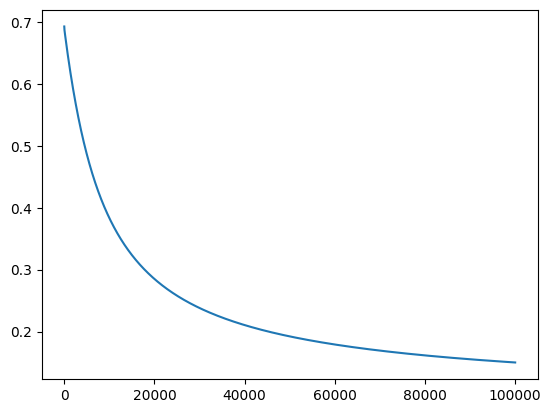

In [ ]:
plt.plot(np.arange(iterations), cost_list)
plt.show()

In [ ]:
def accuracy(X, Y, W, B):

    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)

    A = A > 0.5

    A = np.array(A, dtype = 'int64')

    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100

    print(f"Accuracy of the model is : {round(acc, 2)}%")

accuracy(X_test, Y_test, W, B)
#accuracy of the model using training data set is less while test_set is 100% it is entirely possible since only 100 data sets were
#there in total in which i used 80 for training and 20 for test. Due to less sample size accuracy is coming to be 100% for test_Data set
accuracy(X_train, Y_train, W, B)

Accuracy of the model is : 100.0%
Accuracy of the model is : 96.25%
